# [Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommenation System - 89]

Group Members:

Ahmet Karapınar
<br>
Ahmet Baran Ayhan
<br>


# Introduction
This step's goal is to show relationships between the some features in the Spotify dataset, analyze and visualize them and finally build a simple recommendation system with machine learning algorithms.

DRIVE CONNECTION

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from scipy import stats
from scipy import special
from os.path import join

fileName = "data_w_genres.csv"
fileName2 = "data.csv"
df = pd.read_csv(join(path_prefix,fileName2),na_filter=True, na_values='[]')
df2 = pd.read_csv(join(path_prefix,fileName),na_filter=True, na_values='[]')


# Utilized Datasets

<p>We didn't use any additional dataset. The link of the dataset we use is <a>https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks</a></p>
Our steps in the Explotary Data Analysis:
<ul>
<li>Understanding the Data</li>
<li>Cleaning the Data </li>
<li>Showing relationships, Analyze Features and Visualization</li>
</ul>


#Understanding the data
<h5>Before merging the dataframes of data_w_genres.csv and data.csv, we must extract artist from the list in data.csv. Then we can merge data frames on artists column. After the merging operation, there are 2 columns for each features resulted from both csv files. So we should calculate the mean the features and add it as a new column.</h5>


In [ ]:
df["artists"] = df.artists.apply(lambda x:x.replace("[","").replace("]","").replace("'","").split(","))
df = df.explode("artists")

df3 = pd.merge(df,df2,on=["artists"])
df3['acousticness'] = df3[['acousticness_x', 'acousticness_y']].mean(axis=1)
df3['danceability'] = df3[['danceability_x', 'danceability_y']].mean(axis=1)
df3['duration_ms'] = df3[['duration_ms_x', 'duration_ms_y']].mean(axis=1)
df3['energy'] = df3[['energy_x', 'energy_y']].mean(axis=1)
df3['instrumentalness'] = df3[['instrumentalness_x', 'instrumentalness_y']].mean(axis=1)
df3['liveness'] = df3[['liveness_x', 'liveness_y']].mean(axis=1)
df3['loudness'] = df3[['loudness_x', 'loudness_y']].mean(axis=1)
df3['popularity'] = df3[['popularity_x', 'popularity_y']].mean(axis=1)
df3['speechiness'] = df3[['speechiness_x', 'speechiness_y']].mean(axis=1)
df3['tempo'] = df3[['tempo_x', 'tempo_y']].mean(axis=1)
df3['valence'] = df3[['valence_x', 'valence_y']].mean(axis=1)
df3 = df3.drop(['acousticness_x','explicit','id','danceability_x','duration_ms_x','energy_x','instrumentalness_x','key_x','liveness_x','loudness_x','mode_x','popularity_x','speechiness_x','tempo_x','valence_x'],axis=1)
df3 = df3.drop(['acousticness_y','danceability_y','duration_ms_y','energy_y','instrumentalness_y','key_y','liveness_y','loudness_y','mode_y','popularity_y','speechiness_y','tempo_y','valence_y'],axis=1)
df3.head(10)

,artists,name,release_date,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
0,Mamie Smith,Keep A Song In Your Soul,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.987000,0.612625,173157.375,0.204278,0.000405,0.375812,-12.714156,7.59375,0.107519,131.492969,0.637531
1,Mamie Smith,Golfing Papa,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.988000,0.637125,170904.375,0.185278,0.000153,0.445813,-12.449156,3.59375,0.147719,105.304969,0.665031
2,Mamie Smith,Don't You Advertise Your Man,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.987500,0.704625,186590.875,0.120928,0.000145,0.274313,-12.626656,4.09375,0.090319,99.330969,0.564031
3,Mamie Smith,Kansas City Man Blues - 78rpm Version,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.989000,0.554625,187990.875,0.206778,0.000174,0.460812,-12.709656,3.59375,0.101319,95.120969,0.551031
4,Mamie Smith,Miss Jenny's Ball (aka There'll Be No Freebies...,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.987500,0.600625,183890.875,0.161278,0.000390,0.302812,-13.485656,2.09375,0.115219,135.715969,0.702531
5,Mamie Smith,The Lure Of The South,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.980000,0.610625,172710.875,0.212278,0.000144,0.437812,-12.404656,1.59375,0.107069,94.006469,0.698031
6,Mamie Smith,Do It Mr. So-And-So,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.989000,0.613625,181910.875,0.129928,0.001379,0.300812,-13.821156,2.09375,0.160219,159.980469,0.565531
7,Mamie Smith,My Sportin' Man,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.984500,0.617125,178024.375,0.234278,0.000145,0.431812,-11.962156,1.59375,0.166719,113.638469,0.608531
8,Mamie Smith,The Lure of the South - Live,1927,1927,16,"['harlem renaissance', 'traditional blues']",0.960500,0.651125,173624.375,0.189778,0.000144,0.331813,-13.494656,2.09375,0.106169,97.038969,0.694531
9,Oscar Velazquez,True House Music - Xavier Santos & Carlos Gomi...,1920-01-01,1920,6,['circuit'],0.000309,0.691667,414701.000,0.809500,0.828833,0.107150,-7.528333,14.00000,0.045450,128.328333,0.081300


In [ ]:
df3.shape # our dataframe is big enough to analysis

(172199, 17)

In [ ]:
df3.info(); # showin features' data types 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172199 entries, 0 to 172198
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           172199 non-null  object 
 1   name              172199 non-null  object 
 2   release_date      172199 non-null  object 
 3   year              172199 non-null  int64  
 4   count             172199 non-null  int64  
 5   genres            145307 non-null  object 
 6   acousticness      172199 non-null  float64
 7   danceability      172199 non-null  float64
 8   duration_ms       172199 non-null  float64
 9   energy            172199 non-null  float64
 10  instrumentalness  172199 non-null  float64
 11  liveness          172199 non-null  float64
 12  loudness          172199 non-null  float64
 13  popularity        172199 non-null  float64
 14  speechiness       172199 non-null  float64
 15  tempo             172199 non-null  float64
 16  valence           17

In [ ]:
df3.describe() # showing simple statistical information about data

,year,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
count,172199.000000,172199.000000,172199.000000,172199.000000,1.721990e+05,172199.000000,172199.000000,172199.000000,172199.000000,172199.000000,172199.000000,172199.000000,172199.000000
mean,1977.027236,261.127312,0.499788,0.536608,2.329578e+05,0.482303,0.197934,0.211202,-11.757683,25.666954,0.106237,116.996486,0.524192
std,26.949030,524.372368,0.349951,0.146472,1.186039e+05,0.243097,0.285470,0.121557,5.036964,20.260813,0.174140,19.556829,0.207840
min,1920.000000,1.000000,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,1955.000000,18.000000,0.156404,0.436983,1.764970e+05,0.268203,0.001387,0.135028,-14.520475,3.833333,0.041021,102.784099,0.371094
50%,1977.000000,72.000000,0.490220,0.541734,2.133259e+05,0.472500,0.034160,0.173292,-11.048500,27.122222,0.051976,116.285353,0.535891
75%,1999.000000,234.000000,0.856398,0.644242,2.638059e+05,0.679507,0.308414,0.248879,-8.009404,40.571429,0.083200,129.148409,0.684641
max,2021.000000,3179.000000,0.996000,0.987000,5.013918e+06,1.000000,1.000000,0.986000,3.367000,94.000000,0.971000,219.833000,0.997000


In [ ]:
df3.dtypes #showing data types 

artists              object
name                 object
release_date         object
year                  int64
count                 int64
genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
popularity          float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

#Cleaning the data

In [ ]:
df3.isnull().sum() #number of missing values

artists                 0
name                    0
release_date            0
year                    0
count                   0
genres              26892
acousticness            0
danceability            0
duration_ms             0
energy                  0
instrumentalness        0
liveness                0
loudness                0
popularity              0
speechiness             0
tempo                   0
valence                 0
dtype: int64

<h2>Removing row that's genre is empty</h2>

In [ ]:
df3 = df3.dropna()
droppedDf = df3.dropna() #This data set will be useful for analysing the genres.
droppedDf.head(20)


,artists,name,release_date,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
0,Mamie Smith,Keep A Song In Your Soul,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.987000,0.612625,173157.375000,0.204278,0.000405,0.375812,-12.714156,7.593750,0.107519,131.492969,0.637531
1,Mamie Smith,Golfing Papa,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.988000,0.637125,170904.375000,0.185278,0.000153,0.445813,-12.449156,3.593750,0.147719,105.304969,0.665031
2,Mamie Smith,Don't You Advertise Your Man,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.987500,0.704625,186590.875000,0.120928,0.000145,0.274313,-12.626656,4.093750,0.090319,99.330969,0.564031
3,Mamie Smith,Kansas City Man Blues - 78rpm Version,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.989000,0.554625,187990.875000,0.206778,0.000174,0.460812,-12.709656,3.593750,0.101319,95.120969,0.551031
4,Mamie Smith,Miss Jenny's Ball (aka There'll Be No Freebies...,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.987500,0.600625,183890.875000,0.161278,0.000390,0.302812,-13.485656,2.093750,0.115219,135.715969,0.702531
5,Mamie Smith,The Lure Of The South,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.980000,0.610625,172710.875000,0.212278,0.000144,0.437812,-12.404656,1.593750,0.107069,94.006469,0.698031
6,Mamie Smith,Do It Mr. So-And-So,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.989000,0.613625,181910.875000,0.129928,0.001379,0.300812,-13.821156,2.093750,0.160219,159.980469,0.565531
7,Mamie Smith,My Sportin' Man,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.984500,0.617125,178024.375000,0.234278,0.000145,0.431812,-11.962156,1.593750,0.166719,113.638469,0.608531
8,Mamie Smith,The Lure of the South - Live,1927,1927,16,"['harlem renaissance', 'traditional blues']",0.960500,0.651125,173624.375000,0.189778,0.000144,0.331813,-13.494656,2.093750,0.106169,97.038969,0.694531
9,Oscar Velazquez,True House Music - Xavier Santos & Carlos Gomi...,1920-01-01,1920,6,['circuit'],0.000309,0.691667,414701.000000,0.809500,0.828833,0.107150,-7.528333,14.000000,0.045450,128.328333,0.081300


#Adding a New Column to the Data Set

In [ ]:
#categorize feature 'energy' as 4 types in new column as energy_level
def energy_level_analysis(energy):
  if energy < 0.25:
    return "very low energy"
  elif energy < 0.50:
    return "low energy"
  elif energy < 0.75:
    return "medium energy"
  elif energy < 1:
    return "high energy"


df3["energy_level"] = df3["energy"].apply(energy_level_analysis)
df3.head(10)


,artists,name,release_date,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,energy_level
0,Mamie Smith,Keep A Song In Your Soul,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.987000,0.612625,173157.375,0.204278,0.000405,0.375812,-12.714156,7.59375,0.107519,131.492969,0.637531,very low energy
1,Mamie Smith,Golfing Papa,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.988000,0.637125,170904.375,0.185278,0.000153,0.445813,-12.449156,3.59375,0.147719,105.304969,0.665031,very low energy
2,Mamie Smith,Don't You Advertise Your Man,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.987500,0.704625,186590.875,0.120928,0.000145,0.274313,-12.626656,4.09375,0.090319,99.330969,0.564031,very low energy
3,Mamie Smith,Kansas City Man Blues - 78rpm Version,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.989000,0.554625,187990.875,0.206778,0.000174,0.460812,-12.709656,3.59375,0.101319,95.120969,0.551031,very low energy
4,Mamie Smith,Miss Jenny's Ball (aka There'll Be No Freebies...,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.987500,0.600625,183890.875,0.161278,0.000390,0.302812,-13.485656,2.09375,0.115219,135.715969,0.702531,very low energy
5,Mamie Smith,The Lure Of The South,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.980000,0.610625,172710.875,0.212278,0.000144,0.437812,-12.404656,1.59375,0.107069,94.006469,0.698031,very low energy
6,Mamie Smith,Do It Mr. So-And-So,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.989000,0.613625,181910.875,0.129928,0.001379,0.300812,-13.821156,2.09375,0.160219,159.980469,0.565531,very low energy
7,Mamie Smith,My Sportin' Man,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.984500,0.617125,178024.375,0.234278,0.000145,0.431812,-11.962156,1.59375,0.166719,113.638469,0.608531,very low energy
8,Mamie Smith,The Lure of the South - Live,1927,1927,16,"['harlem renaissance', 'traditional blues']",0.960500,0.651125,173624.375,0.189778,0.000144,0.331813,-13.494656,2.09375,0.106169,97.038969,0.694531,very low energy
9,Oscar Velazquez,True House Music - Xavier Santos & Carlos Gomi...,1920-01-01,1920,6,['circuit'],0.000309,0.691667,414701.000,0.809500,0.828833,0.107150,-7.528333,14.00000,0.045450,128.328333,0.081300,high energy


#Popularity and Energy level Relation
<p>With the help of the analyze, we can understand which energy level is more popular.</p>

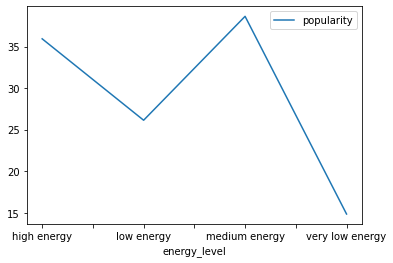

In [ ]:
df4 = df3.groupby(by="energy_level").mean()
df4 = df4.drop(["year","acousticness","duration_ms","instrumentalness","loudness","speechiness","tempo","valence","count","energy","danceability","liveness"], axis=1)
line = df4.plot()

-According to this analysis we can say that the most popular songs have medium energy level, high energy level songs are less popular than medium energy level songs. Low energy level songs are less popular than high energy level songs. Popularity of very low energy level songs are very low.<br>
-We can conclude that, the songs which have medium enery are the most popular ones and the songs which have very low energy are the least popular ones.

#Analysis of Most and Least Popular Songs of All Time



In [ ]:
df3.sort_values('popularity',ascending=False).head(10) #Most popular songs

,artists,name,release_date,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,energy_level
119699,Olivia Rodrigo,drivers license,2021-01-08,2021,8,"['pop', 'post-teen pop']",0.537112,0.521375,222008.375000,0.439188,0.000008,0.103500,-7.953313,91.125000,0.051000,122.980937,0.151312,low energy
137947,Joel Corry,Head & Heart (feat. MNEK),2020-07-03,2020,1,"['dance pop', 'house', 'pop dance', 'tropical ...",0.168000,0.734000,166028.000000,0.874000,0.000011,0.048900,-3.158000,91.000000,0.066200,122.953000,0.905000,high energy
120364,Ritt Momney,Put Your Records On,2020-04-24,2020,2,['bedroom pop'],0.056300,0.399000,210463.000000,0.491000,0.000890,0.110000,-10.778000,89.000000,0.053800,91.066000,0.151000,low energy
157808,Lele Pons,Se Te Nota (with Guaynaa),2020-09-02,2020,1,"['latin pop', 'viral pop']",0.090700,0.905000,155825.000000,0.686000,0.000000,0.266000,-3.152000,89.000000,0.066400,103.013000,0.963000,medium energy
152718,Jay Wheeler,La Curiosidad,2020-06-12,2020,2,"['latin', 'reggaeton', 'trap latino']",0.227750,0.844000,259924.750000,0.676250,0.000688,0.113750,-4.936000,87.500000,0.126050,90.011500,0.700250,medium energy
119638,Tones And I,Dance Monkey,2019-10-17,2019,4,"['australian pop', 'pop']",0.573250,0.819500,201617.750000,0.569250,0.000078,0.166000,-6.352000,87.250000,0.086425,104.767250,0.510500,medium energy
120297,Lil Nas X,HOLIDAY,2020-11-13,2020,9,"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",0.140661,0.801722,145976.555556,0.542500,0.000004,0.114622,-6.525944,86.000000,0.134650,148.952000,0.720167,medium energy
152884,Jerry Di,Mi Cuarto,2020-04-03,2020,2,"['cubaton', 'latin', 'pop venezolano', 'reggae...",0.819000,0.854000,197587.000000,0.525000,0.000000,0.146000,-4.426000,86.000000,0.214000,97.054000,0.630000,medium energy
119762,Surf Mesa,ily (i love you baby) (feat. Emilee),2019-11-26,2019,1,['tropical house'],0.068600,0.674000,176547.000000,0.774000,0.001880,0.393000,-7.567000,86.000000,0.089200,112.050000,0.330000,high energy
120270,The Kid LAROI,WITHOUT YOU,2020-11-06,2020,37,['australian hip hop'],0.182023,0.663514,158360.932432,0.494514,0.000000,0.160507,-6.922108,85.972973,0.075918,104.952257,0.421865,low energy


In [ ]:
df3.sort_values('popularity',ascending=True).head(10) #Least popular songs

,artists,name,release_date,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,energy_level
138637,Carmelo Zappulla,Nun se po' murì d'ammore,1940-06-29,1940,2,['canzone napoletana'],0.532000,0.428000,284933.0,0.355000,0.000268,0.251000,-8.73600,0.0,0.031600,146.348000,0.456000,low energy
167794,Meditation Yoga Music Masters,2018 Meditation with Nature,2019-07-24,2019,2,['yoga'],0.836000,0.162000,192268.0,0.063500,0.968000,0.095900,-23.67900,0.0,0.045300,109.331000,0.038500,very low energy
167795,Hungryheart,River of Soul (2018 Version) [Bonus Track],2018-06-01,2018,4,['nwocr'],0.069625,0.633250,334153.5,0.696250,0.000000,0.372000,-9.80800,0.0,0.038200,109.580500,0.533000,medium energy
167796,Hungryheart,The Only One (2018 Acoustic Version) [Bonus Tr...,2018-06-01,2018,4,['nwocr'],0.141875,0.679750,260566.5,0.538750,0.000000,0.492000,-12.12800,0.0,0.040800,112.525500,0.569000,medium energy
167819,Flashmob,Year1993,2018-09-07,2018,2,['italian tech house'],0.187000,0.792000,430062.0,0.696000,0.912000,0.111000,-10.50900,0.0,0.034800,126.009000,0.154000,medium energy
167826,Roberto,Fable 2018 (Extended Dream Version),2018-12-12,2018,2,"['jovem guarda', 'mpb']",0.000953,0.519000,298075.0,0.820000,0.000113,0.166000,-4.81300,0.0,0.051500,127.954000,0.075100,high energy
167832,Lydia Sanz,Wonder Years,2018-12-24,2018,4,['circuit'],0.002430,0.660875,378067.0,0.892125,0.377750,0.141887,-6.38875,0.0,0.056275,127.996375,0.289125,high energy
167833,Lydia Sanz,Wonder Years - Esteban Lopez Remix,2018-08-20,2018,4,['circuit'],0.002396,0.566375,379063.0,0.969625,0.378250,0.127287,-2.83175,0.0,0.093125,127.993875,0.325625,high energy
167834,Lydia Sanz,Wonder Years - Mauro Mozart Remix,2018-12-10,2018,4,['circuit'],0.011153,0.682375,404339.0,0.955625,0.479750,0.440737,-3.57475,0.0,0.056775,127.997875,0.418125,high energy
167835,Lydia Sanz,Wonder Years - Luis Mendez Remix,2018-04-02,2018,4,['circuit'],0.002442,0.697375,400567.0,0.947625,0.382250,0.123988,-4.90275,0.0,0.070825,127.994875,0.352125,high energy


<h1>Setting Time Index</h1>
<p>In this part, we convert release_date to 'date_time' type and then set it as index.</p>

In [ ]:
droppedDf.set_index("release_date",inplace=True)
droppedDf.index = pd.to_datetime(droppedDf.index)
droppedDf.head()

,artists,name,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
release_date,,,,,,,,,,,,,,,,
1920-01-01,Mamie Smith,Keep A Song In Your Soul,1920,16,"['harlem renaissance', 'traditional blues']",0.9870,0.612625,173157.375,0.204278,0.000405,0.375812,-12.714156,7.59375,0.107519,131.492969,0.637531
1920-01-01,Mamie Smith,Golfing Papa,1920,16,"['harlem renaissance', 'traditional blues']",0.9880,0.637125,170904.375,0.185278,0.000153,0.445813,-12.449156,3.59375,0.147719,105.304969,0.665031
1920-01-01,Mamie Smith,Don't You Advertise Your Man,1920,16,"['harlem renaissance', 'traditional blues']",0.9875,0.704625,186590.875,0.120928,0.000145,0.274313,-12.626656,4.09375,0.090319,99.330969,0.564031
1920-01-01,Mamie Smith,Kansas City Man Blues - 78rpm Version,1920,16,"['harlem renaissance', 'traditional blues']",0.9890,0.554625,187990.875,0.206778,0.000174,0.460812,-12.709656,3.59375,0.101319,95.120969,0.551031
1920-01-01,Mamie Smith,Miss Jenny's Ball (aka There'll Be No Freebies...,1920,16,"['harlem renaissance', 'traditional blues']",0.9875,0.600625,183890.875,0.161278,0.000390,0.302812,-13.485656,2.09375,0.115219,135.715969,0.702531


We are resampling the data to understand the change of the features of the songs.

In [ ]:
decadeDf = droppedDf.resample(rule='10A').mean()
decadeDf.index = [f"{date_index-10}'s" for date_index in decadeDf.index.year]
decadeDf.head()
decadeDf

,year,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
1910's,1920.000000,614.135922,0.728583,0.544298,192223.547034,0.373769,0.345354,0.216710,-11.955104,1.076232,0.100533,116.380285,0.486151
1920's,1927.479927,1182.945566,0.954048,0.555817,196553.758550,0.250334,0.447552,0.197332,-15.685433,2.091542,0.143710,111.204534,0.582106
1930's,1935.889659,735.353274,0.889553,0.526571,222479.700522,0.285210,0.307190,0.219965,-14.274380,4.977770,0.123861,112.798635,0.565329
1940's,1946.138305,405.680015,0.916907,0.435157,242201.119159,0.236669,0.402184,0.208665,-16.151623,4.501853,0.084903,107.179440,0.432855
1950's,1955.727545,311.973406,0.830805,0.467952,225133.672434,0.286747,0.250180,0.206673,-14.805496,14.316560,0.072883,110.537080,0.467187
1960's,1965.517721,276.540172,0.595212,0.497780,216494.463272,0.431074,0.157553,0.210262,-12.421850,27.898892,0.055766,115.734293,0.555283
1970's,1975.510119,201.245122,0.385505,0.531198,252144.304199,0.539967,0.112430,0.213964,-11.301943,34.480202,0.059785,120.051640,0.584013
1980's,1985.478259,135.238895,0.317044,0.538518,250544.682003,0.586266,0.126601,0.202705,-11.211669,37.018630,0.062592,120.805007,0.552615
1990's,1995.277353,101.039830,0.314716,0.567978,245134.387098,0.586145,0.117109,0.198300,-9.822954,42.996051,0.082214,119.523918,0.549215
2000's,2005.650030,89.054391,0.259273,0.568581,239814.452436,0.660305,0.115224,0.209751,-7.751740,43.458969,0.085736,121.806655,0.533675


#Change In Features of Songs over Decades

---



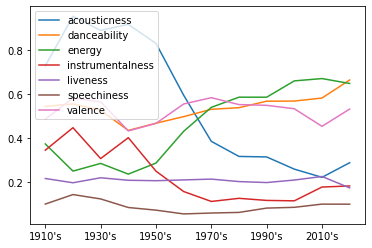

In [ ]:
shiftDf = decadeDf.drop(["year","tempo","popularity","duration_ms","loudness","count"],axis=1)#dropping the unnecessary data
line = shiftDf.plot.line()

According to this analysis, we can say that:<br>
-<strong>Acousticness</strong>	of songs is decreased between 1950's and 2010's. <br>
-<strong>Danceability</strong> of songs is not changed too much but we can say that it increase between 1940's and 2020's. <br>
-There is a significant increase in <strong>energy</strong> of songs between 1940's and 2020's. <br>
-<strong>Instrumentalness</strong> of songs decreased between 1940's and 1970's.<br>
-<strong>Liveness</strong> of the songs are almost constanst but there are small changes.<br>
-<strong>Speechiness</strong> of the songs are almost constanst but there are small changes.<br>
-<strong>Valence</strong> of the songs is very inconsistant.


#Most and Least Popular Genres of All Time

We categorized genres by group by method.

In [ ]:
droppedDf["genres"] = droppedDf.genres.apply(lambda x:x.replace("[","").replace("]","").replace("'","").split(","))
droppedDf = droppedDf.explode("genres") #Exploding genres.
genreDf = droppedDf.groupby("genres").mean()
genreDf.sort_values("popularity",ascending=False).head(10)


,year,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
genres,,,,,,,,,,,,,
tropical house,2019.0,1.0,0.06860,0.674,176547.0,0.7740,0.001880,0.39300,-7.5670,86.0,0.08920,112.0500,0.3300
pop venezolano,2018.5,2.0,0.42105,0.799,201651.0,0.6645,0.000000,0.09770,-5.3765,80.5,0.14085,100.9385,0.5280
indie rockism,2019.0,2.0,0.01280,0.606,232907.0,0.7990,0.000000,0.15000,-4.4520,80.0,0.02610,103.0140,0.6380
korean mask singer,2020.0,2.0,0.23800,0.658,199027.0,0.7490,0.000002,0.27200,-2.9670,78.0,0.06340,128.9090,0.4420
basshall,2019.0,1.0,0.21600,0.767,192452.0,0.6430,0.000104,0.08060,-5.2250,77.0,0.10100,169.9900,0.5360
san diego rap,2016.0,1.0,0.03120,0.886,177184.0,0.4270,0.000990,0.09060,-10.0280,77.0,0.14500,108.0340,0.2300
dutch rap pop,2019.0,1.0,0.21600,0.767,192452.0,0.6430,0.000104,0.08060,-5.2250,77.0,0.10100,169.9900,0.5360
ritmo kombina,2019.0,1.0,0.21600,0.767,192452.0,0.6430,0.000104,0.08060,-5.2250,77.0,0.10100,169.9900,0.5360
yaoi,2018.0,1.0,0.00655,0.603,206180.0,0.9640,0.000003,0.14300,-2.8860,77.0,0.04870,135.0280,0.7960


In [ ]:
genreDfTop5 = genreDf.sort_values("popularity",ascending=False).head(5)


<h2>Visualization of Genre and Popularity</h2>

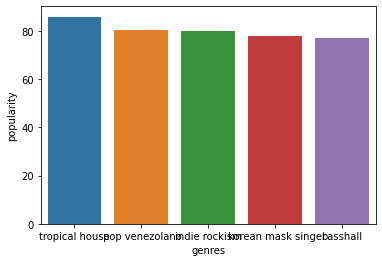

In [ ]:
sns.barplot(data=genreDfTop5,x=genreDfTop5.index,y="popularity")
sns.set(rc={'figure.figsize':(12,12)})

#Top 10 Popular Artists of All Time

In [ ]:
artistsDf =  droppedDf.groupby("artists").mean() # We categorized artists by group by method.
artistsDf = artistsDf.sort_values("popularity",ascending=False).head(10)
artistsDf

,year,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
artists,,,,,,,,,,,,,
Joel Corry,2020.0,1.0,0.168000,0.734000,166028.00,0.874000,0.000011,0.048900,-3.158,91.000000,0.066200,122.953000,0.905000
Ritt Momney,2020.0,2.0,0.056300,0.399000,210463.00,0.491000,0.000890,0.110000,-10.778,89.000000,0.053800,91.066000,0.151000
Lele Pons,2020.0,1.0,0.090700,0.905000,155825.00,0.686000,0.000000,0.266000,-3.152,89.000000,0.066400,103.013000,0.963000
Surf Mesa,2019.0,1.0,0.068600,0.674000,176547.00,0.774000,0.001880,0.393000,-7.567,86.000000,0.089200,112.050000,0.330000
Jerry Di,2020.0,2.0,0.819000,0.854000,197587.00,0.525000,0.000000,0.146000,-4.426,86.000000,0.214000,97.054000,0.630000
Jay Wheeler,2020.0,2.0,0.186500,0.843000,300801.50,0.675500,0.000458,0.119500,-5.074,86.000000,0.116100,90.010000,0.720500
Tones And I,2019.5,4.0,0.454500,0.815000,193797.50,0.550500,0.000052,0.183000,-6.304,85.500000,0.080450,111.507500,0.508000
Regard,2019.5,3.0,0.120417,0.866667,165589.75,0.758083,0.000365,0.143083,-4.728,84.333333,0.066525,118.370083,0.839417
THE SCOTTS,2020.0,1.0,0.233000,0.716000,165978.00,0.537000,0.000000,0.157000,-7.648,84.000000,0.051400,129.979000,0.280000


In [ ]:
artistsDf = artistsDf.drop(["year","count","duration_ms","loudness","popularity","tempo"],axis=1) #drop unnecessary features.


<h2>Top 10 Artist Feature Analyze</h2>

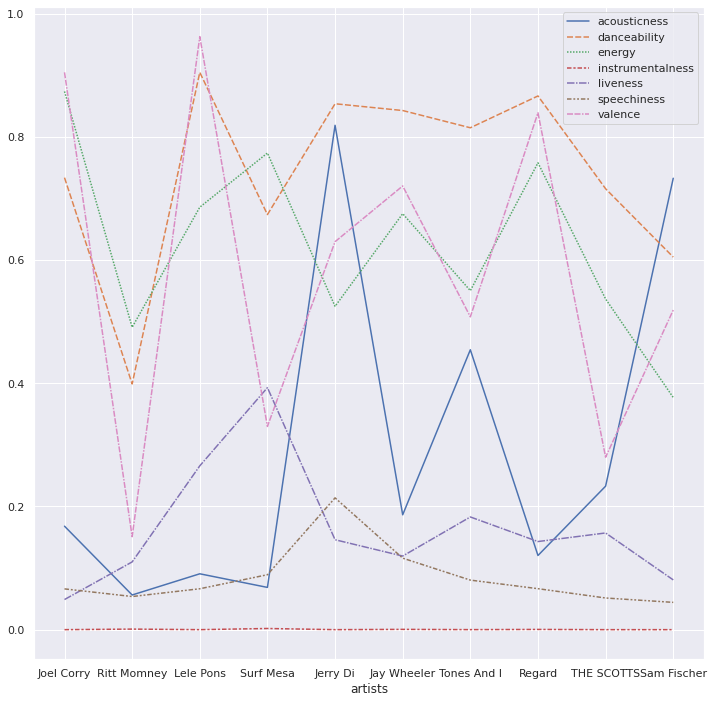

In [ ]:
linePlot2 = sns.lineplot(data=artistsDf)

sns.set(rc={'figure.figsize':(10,9)})

#Changing Songs of Different Genres 

##Metal Songs Feature Analysis by Time

In [ ]:
df_metal = droppedDf[droppedDf["genres"] == "metal"]#New data set which contains only "metal" genres
df_metal = df_metal.sort_index(ascending=True)
print("Shape: ",df_metal.shape)
df_metal.head(10)

Shape:  (57, 16)


,artists,name,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
release_date,,,,,,,,,,,,,,,,
1986-01-01,Dark Angel,Death is Certain (Life is Not),1986,10,metal,0.012710,0.222000,268090.600000,0.95260,0.248000,0.195300,-4.803900,27.100000,0.149240,172.16480,0.191290
1986-01-01,Dark Angel,The Burning of Sodom,1986,10,metal,0.012705,0.240000,238737.600000,0.95010,0.508500,0.283300,-5.073400,28.600000,0.170240,138.90680,0.141790
1986-01-01,Dark Angel,Merciless Death,1986,10,metal,0.012709,0.257500,262850.600000,0.94810,0.500000,0.168300,-5.462900,30.600000,0.166740,136.77680,0.119340
1986-01-01,Dark Angel,Darkness Descends,1986,10,metal,0.012707,0.304500,315230.600000,0.95410,0.404000,0.197800,-5.386900,32.100000,0.201240,133.51430,0.110690
1986-01-01,Flotsam & Jetsam,Hammerhead,1986,4,metal,0.002786,0.192750,374803.250000,0.94050,0.029834,0.113975,-10.198250,37.750000,0.086250,139.00300,0.142500
1986-09-01,Crimson Glory,Queen of the Masquerade,1986,2,metal,0.000744,0.244000,332053.000000,0.94300,0.000027,0.157000,-4.208000,34.000000,0.156000,174.33300,0.544000
1988-01-01,Forbidden,Chalice of Blood,1988,6,metal,0.000422,0.274167,305344.166667,0.99550,0.007637,0.144333,-4.507167,34.333333,0.220667,130.83600,0.077433
1988-01-01,Forbidden,Through Eyes of Glass,1988,6,metal,0.000377,0.274167,361344.166667,0.99250,0.021047,0.255833,-4.663167,32.833333,0.178167,123.94850,0.176583
1988-05-15,Flotsam & Jetsam,No Place for Disgrace,1988,4,metal,0.000937,0.200250,373609.750000,0.92150,0.087945,0.233325,-11.298750,35.250000,0.067950,105.89300,0.179500


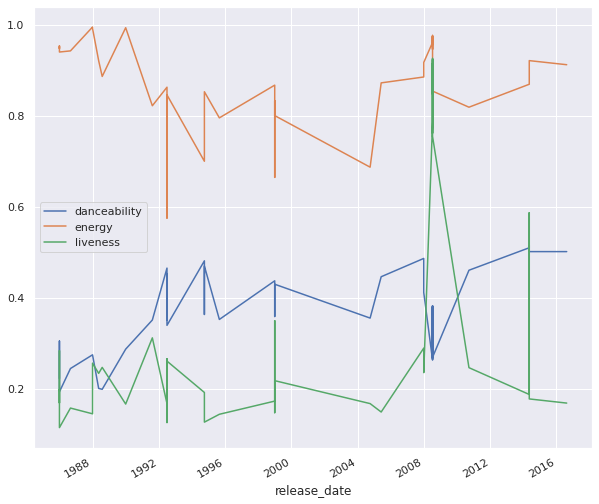

In [ ]:
#Change of energy, liveness and danceability features of metal songs.
df2_metal = df_metal.drop(["artists","name","year","acousticness","duration_ms","instrumentalness","loudness","popularity","speechiness","tempo","valence","count"], axis=1)
lines = df2_metal.plot.line()

With the help of this analysis we can see the change in these features of metal songs.<br>
-<strong>Energy</strong> of metal songs decreased between 1988 and 2000. We can say that metal songs which are released between 2012 and 2016 have greater energy than which released between 1992 and 1996.<br>
-<strong>Danceability</strong> of metal songs increased between 1988 and 1992.<br>
-<strong>Liveness</strong> of the metal songs increased significantly between 2008 and 2010.


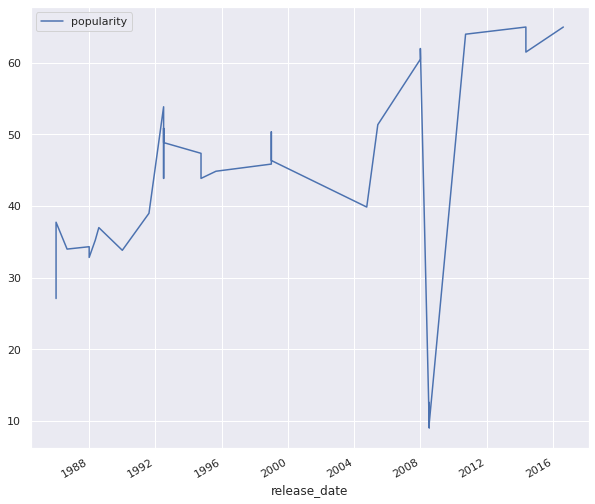

In [ ]:
#Popularity of metal songs by time
df_metal_popularity = df_metal.drop(["artists","name","year","acousticness","duration_ms","instrumentalness","loudness","speechiness","tempo","valence","count","energy","danceability","liveness"], axis=1)
lines_metal_popularity = df_metal_popularity.plot.line()

-According to this analysis popularity of metal songs increased consistantly except some time periods.<br>
-Metal songs which released after 2010 are more popular than metal songs which released between 1988 and 2010. <br>
-There is a significant popularity decreased between 2008 and 2009.<br>

##Rap Songs Feature Analysis by Time 


In [ ]:
df_rap = droppedDf[droppedDf["genres"] == "rap"]#New data set which contains only "rap" genres
df_rap = df_rap.sort_index(ascending=True)
print("Shape: ",df_rap.shape)
df_rap.head(10)

Shape:  (74, 16)


,artists,name,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
release_date,,,,,,,,,,,,,,,,
1999-01-01,Travis,Why Does It Always Rain On Me?,1999,6,rap,0.052788,0.462167,254673.333333,0.650333,0.000097,0.141667,-7.927333,63.500000,0.030950,114.648167,0.379333
2001-06-12,Travis,Side,2001,6,rap,0.013534,0.441167,241793.333333,0.806333,0.000035,0.335567,-6.025833,62.500000,0.031700,105.901667,0.460333
2001-06-12,Travis,Sing,2001,6,rap,0.013404,0.378667,236573.333333,0.834333,0.000031,0.138167,-5.818833,66.000000,0.042350,141.995167,0.323333
2013-01-01,Rich Gang,Tapout,2013,2,rap,0.026975,0.708000,280863.500000,0.599500,0.000000,0.103375,-5.230750,58.750000,0.199750,128.457750,0.333000
2013-05-21,Travis Scott,Upper Echelon (feat. T.I. & 2 Chainz),2013,148,rap,0.103347,0.740409,235723.851351,0.608365,0.000579,0.144937,-5.146625,63.560811,0.089426,125.582338,0.224111
2014-06-05,Rich Gang,Lifestyle,2014,2,rap,0.019125,0.600000,273416.500000,0.644500,0.000000,0.094125,-5.234250,64.250000,0.249250,101.263250,0.425000
2014-08-18,Travis Scott,Don't Play (feat. The 1975 & Big Sean),2014,148,rap,0.081962,0.686909,256800.851351,0.664365,0.000579,0.174937,-4.883625,64.060811,0.073176,128.556838,0.210611
2014-08-18,Travis Scott,Mamacita (feat. Rich Homie Quan & Young Thug),2014,148,rap,0.088247,0.757909,250983.851351,0.683865,0.000579,0.164437,-5.993625,68.060811,0.097826,122.060338,0.268111
2014-12-16,Travis Scott,Sky Fall,2014,148,rap,0.187447,0.672409,272870.351351,0.644865,0.000579,0.229437,-6.438625,63.560811,0.085576,113.775338,0.284611


In [ ]:
#Most popular rap artist

df2_rap= df_rap.groupby(by="artists").mean()
df2_rap = df2_rap.sort_values(by="popularity", ascending=False)
df2_rap

,year,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
artists,,,,,,,,,,,,,
THE SCOTTS,2020.000000,1.0,0.233000,0.716000,165978.000000,0.537000,0.000000,0.157000,-7.648000,84.000000,0.051400,129.979000,0.280000
JACKBOYS,2019.000000,4.0,0.071475,0.724500,208440.000000,0.615250,0.000004,0.206750,-5.131000,77.250000,0.225300,131.098750,0.386000
Sheck Wes,2018.000000,4.0,0.163250,0.761500,199120.500000,0.618750,0.007395,0.274250,-5.107000,76.000000,0.098875,140.279750,0.337750
Money Man,2020.000000,6.0,0.082382,0.860833,169669.500000,0.628000,0.046717,0.089733,-7.280167,73.916667,0.081583,130.029667,0.391500
Young Stoner Life,2020.000000,2.0,0.002145,0.902750,178127.000000,0.539000,0.000002,0.140750,-7.677750,73.750000,0.203250,136.984750,0.456750
Aaron May,2019.000000,2.0,0.046000,0.870000,176532.000000,0.498000,0.000000,0.146000,-8.339000,70.000000,0.062300,110.019000,0.692000
Travis Scott,2016.687500,148.0,0.153095,0.685680,232421.445101,0.611125,0.001284,0.201978,-5.518104,69.758727,0.102641,128.079671,0.310951
Key Glock,2018.500000,12.0,0.034040,0.878625,165267.666667,0.579250,0.000139,0.108671,-7.233292,67.583333,0.289750,135.694542,0.440958
Don Toliver,2019.666667,22.0,0.314862,0.703477,182102.757576,0.561856,0.043398,0.207085,-7.384129,67.212121,0.062598,126.030538,0.379266


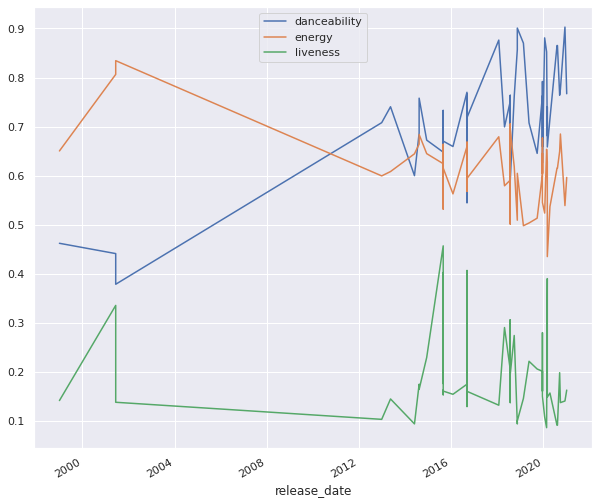

In [ ]:
#Change of energy, liveness and danceability features of rap songs.
df3_rap = df_rap.drop(["artists","name","year","acousticness","duration_ms","instrumentalness","loudness","popularity","speechiness","tempo","valence","count"], axis=1)
lines2 = df3_rap.plot.line()

-According to this analysis <strong>energy</strong> of rap songs linearly decreased 2004 and 2012. After 2016 there are lots of decreases and increases.<br>
-<strong>Danceability</strong> of rap songs appearantly increased between 2004 and 2012. After 2016 there are lots of decreases and increases.<br>
-<strong>Liveness</strong> of the rap songs almost consistent between 2004 and 2012. After 2016 there are lots of decreases and increases.

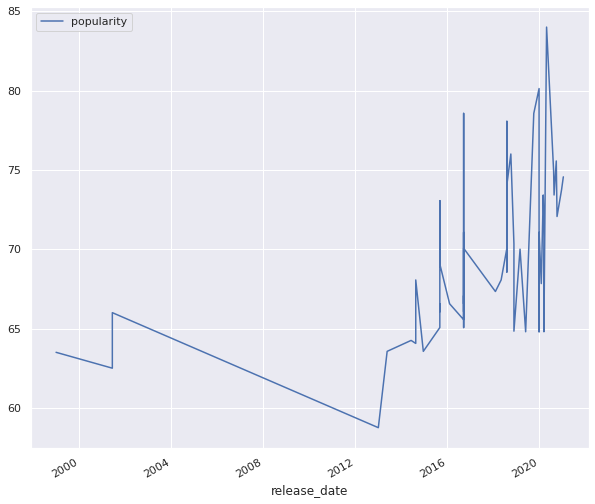

In [ ]:
#Popularity of Rap by time
df_rap_popularity = df_rap.drop(["artists","name","year","acousticness","duration_ms","instrumentalness","loudness","speechiness","tempo","valence","count","energy","danceability","liveness"], axis=1)
lines_rap_pop = df_rap_popularity.plot.line()

-According to this analysis, there is a decrease in <strong>popularity</strong> between 2002 and 2012.<br>
-After 2012 there is increasing trend in <strong>popularity</strong> of rap songs.<br>
-Rap songs which released before 2016 are less <strong>popular</strong> than songs which released after 2016.<br>

##Blues Songs' Features Analysis by Time

In [ ]:
df_blues = droppedDf[droppedDf["genres"] == "blues"]#New data set which contains only "blues" genres
df_blues = df_blues.sort_index(ascending=True)
print("Shape: ",df_blues.shape)
df_blues.head(10)

Shape:  (955, 16)


,artists,name,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
release_date,,,,,,,,,,,,,,,,
1923-01-01,Bessie Smith,Nobody Knows You When You're Down and Out,1923,49,blues,0.991367,0.611122,185013.010204,0.075612,0.018558,0.187257,-12.203582,29.969388,0.052292,88.6345,0.3300
1923-01-01,Bessie Smith,"Empty Bed Blues, Pt. 2",1923,49,blues,0.990367,0.704122,196493.010204,0.077762,0.017176,0.151257,-12.259582,13.969388,0.054442,85.9955,0.4690
1923-01-01,Bessie Smith,There'll Be a Hot Time in the Old Town Tonight,1923,49,blues,0.988367,0.664122,196053.010204,0.161462,0.017096,0.169757,-9.472582,14.469388,0.060542,85.1840,0.5145
1923-01-01,Bessie Smith,Long Old Road,1923,49,blues,0.988867,0.582622,199573.010204,0.094062,0.017093,0.188757,-12.734082,14.969388,0.052592,83.6075,0.4715
1923-01-01,Bessie Smith,You've Been a Good Old Wagon,1923,49,blues,0.991367,0.605122,200626.510204,0.120462,0.029593,0.177757,-11.846582,14.469388,0.052142,82.2670,0.4000
1923-01-01,Bessie Smith,Black Mountain Blues,1923,49,blues,0.990867,0.624622,190200.010204,0.085962,0.017094,0.172257,-12.283582,14.469388,0.061892,76.5600,0.5290
1923-01-01,Bessie Smith,Work House Blues,1923,49,blues,0.991367,0.512622,197080.010204,0.079362,0.078593,0.180257,-12.948582,14.969388,0.042742,83.0550,0.4300
1923-01-01,Bessie Smith,Sobbin' Hearted Blues,1923,49,blues,0.990867,0.511622,186713.010204,0.094212,0.017112,0.308757,-15.773082,16.969388,0.070942,81.0650,0.4460
1923-01-01,Bessie Smith,Gimme a Pigfoot and a Bottle of Beer,1923,49,blues,0.978867,0.649622,200860.010204,0.153462,0.021533,0.172757,-11.769082,17.469388,0.064742,95.6740,0.5035


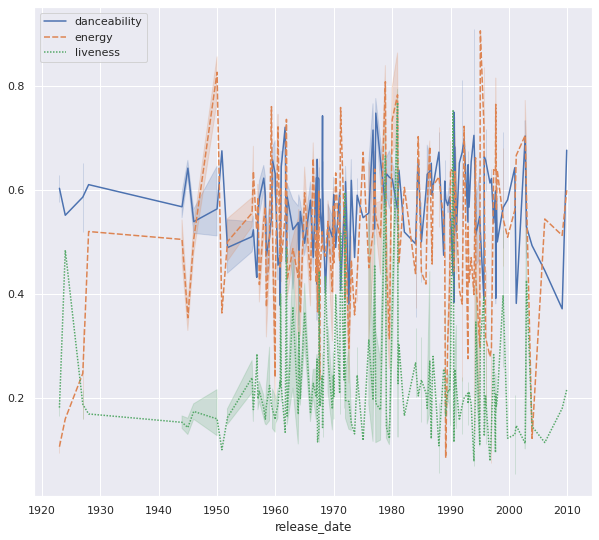

In [ ]:
#Change of energy, liveness and danceability features of blues songs.
df2_blues = df_blues.drop(["artists","name","year","acousticness","duration_ms","instrumentalness","loudness","popularity","speechiness","tempo","valence","count"], axis=1)
lines5 = sns.lineplot(data=df2_blues)
sns.set(rc={'figure.figsize':(18,12)})

According to analysis we can say that:<br>
-<strong>Danceability</strong> of blues songs are mostly between 0.4 and 0.6 between the years 1925 and 2010.<br>
-There is significant increase in <strong>energy</strong> between 1940 and 1950.<br>
-<strong>Liveness</strong> of the blues songs are mostly between 0.2 and 0.4.

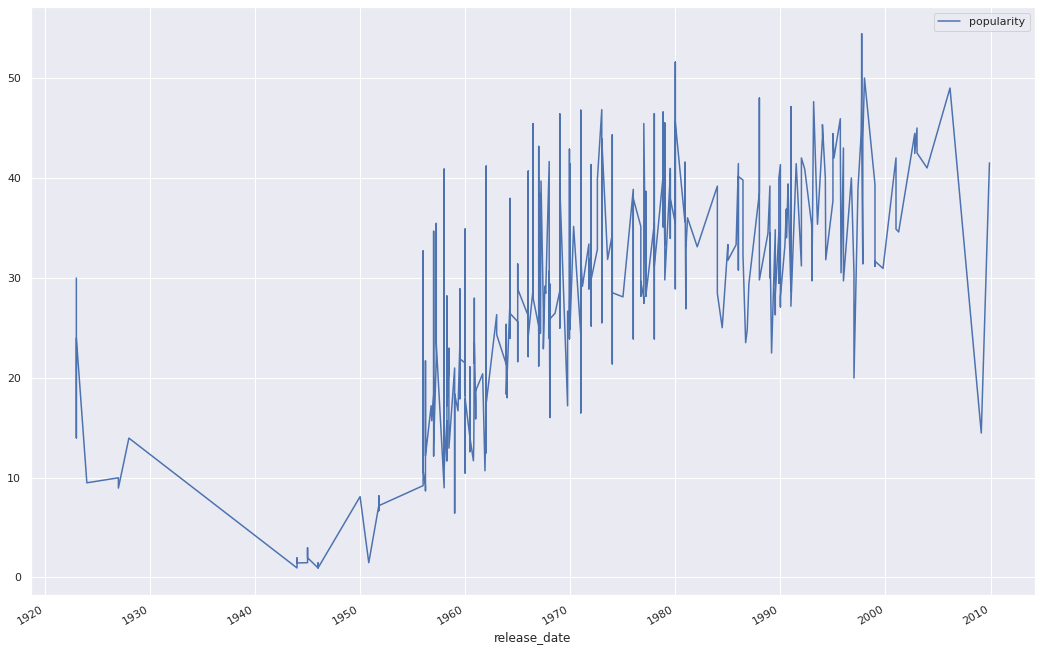

In [ ]:
#Popularity of Blues by time
df_blues_popularity = df_blues.drop(["artists","name","year","acousticness","duration_ms","instrumentalness","loudness","speechiness","tempo","valence","count","energy","danceability","liveness"], axis=1)
lines_blues_popularity = df_blues_popularity.plot.line()

-According to this analysis, blues songs which are released after 1960 are more popular than the ones released between 1930 and 1950.<br>
-There is increasing trend line of popularity 1960 and 1980.<br>
-There is a significant decrease between 2000 and 2008.

<h1>Future Work</h1>
<h3>The Goals for second step of the poject:</h3>
<ul>
<li>Statistical analysis between features of the dataset</li>
<li>To check how significant features affect genres along time</li>
</ul>

# Statistical Analysis & Hypothesis Testing


### How energy level feature contribute to popularity of songs
In this part we are comparing low level energy songs (0.25 < energy < 0.5) with high level energy songs ( 0.75 < energy < 1).

In [ ]:
df3.head(5)

,artists,name,release_date,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,energy_level
0,Mamie Smith,Keep A Song In Your Soul,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.9870,0.612625,173157.375,0.204278,0.000405,0.375812,-12.714156,7.59375,0.107519,131.492969,0.637531,very low energy
1,Mamie Smith,Golfing Papa,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.9880,0.637125,170904.375,0.185278,0.000153,0.445813,-12.449156,3.59375,0.147719,105.304969,0.665031,very low energy
2,Mamie Smith,Don't You Advertise Your Man,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.9875,0.704625,186590.875,0.120928,0.000145,0.274313,-12.626656,4.09375,0.090319,99.330969,0.564031,very low energy
3,Mamie Smith,Kansas City Man Blues - 78rpm Version,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.9890,0.554625,187990.875,0.206778,0.000174,0.460812,-12.709656,3.59375,0.101319,95.120969,0.551031,very low energy
4,Mamie Smith,Miss Jenny's Ball (aka There'll Be No Freebies...,1920,1920,16,"['harlem renaissance', 'traditional blues']",0.9875,0.600625,183890.875,0.161278,0.000390,0.302812,-13.485656,2.09375,0.115219,135.715969,0.702531,very low energy


In [ ]:
#Creating dataframes to compare.
test_type = "popularity"
low_energy_level_songs =df3[df3["energy_level"] == "low energy"][test_type]

high_energy_level_songs =  df3[df3["energy_level"] == "high energy"][test_type]

In [ ]:
print(f"mean popularity of songs which has low energy level: {low_energy_level_songs.mean():.2f}")
print(f"mean popularity of songs which has high energy level: {high_energy_level_songs.mean():.2f}")

mean popularity of songs which has low energy level: 26.14
mean popularity of songs which has high energy level: 35.94


**Hypothesis Test:** We want to test whether there is significant differences between popularity of low level energy songs and high level energy songs.<p>
**Null Hypothesis ( H0 )**: There is no differences between popularity of  low energy level and high energy level songs.<p>
$ H_0: \mu_{e_h} = \mu_{e_l} $ <p>
**Alternative Hypothesis ( HA )**: The songs with high energy level are more popular than songs with low energy level.<p>
$ H_A: \mu_{e_h} > \mu_{e_l} $ <p>
**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

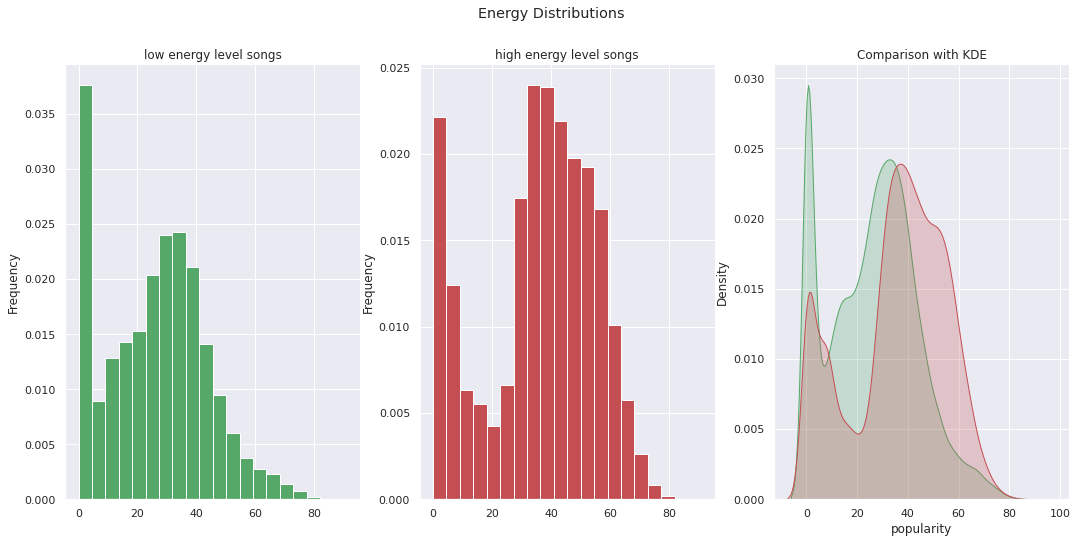

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
low_energy_level_songs.plot(kind="hist", ax=ax[0], bins=20, label="low_energy_level_songs", color="g", density=True)
ax[0].set_title("low energy level songs")


high_energy_level_songs.plot(kind="hist", ax=ax[1], bins=20, label="high_energy_level_songs", color="r", density=True)
ax[1].set_title("high energy level songs")


sns.kdeplot(low_energy_level_songs, shade=True, label="low energy level songs", ax=ax[2], color="g")
sns.kdeplot(high_energy_level_songs, shade=True, label="high energy level songs", ax=ax[2], color="r")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Energy Distributions")
plt.show()

**Conclusion of Hypothesis Testing:**

In [ ]:
#T-test
stats.ttest_ind(high_energy_level_songs, low_energy_level_songs, equal_var=False)

Ttest_indResult(statistic=68.17112882401092, pvalue=0.0)

-Since the p value is less than 0.05 we have to reject Null Hypothesis.<p>
-After the testing we can say that song with high level enery are more popular than low level energy songs. In addition, the test score is positive which indicates that the mean score for songs which have high level energy is higher than low level ones.


### How tempo feature contribute to popularity of songs

Mean of the tempo:  117.46615893321317


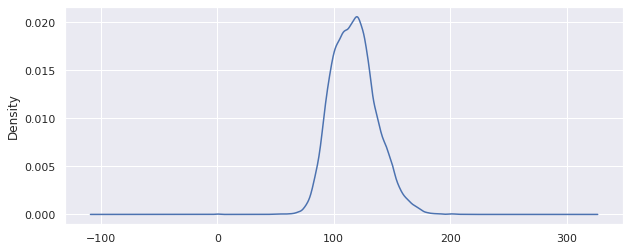

In [ ]:
# To show the distribution of tempo.
tempo = df3["tempo"]
print("Mean of the tempo: ",tempo.mean())
tempo.plot(kind = "density", figsize = (10,4));

In [ ]:
#Creating low tempo songs and high tempo songs.

low_tempo = df3[df3["tempo"] < tempo.mean()]["popularity"]
high_tempo = df3[df3["tempo"] > tempo.mean()]["popularity"]


In [ ]:
print(f"mean popularity of songs which has low tempo level: {low_tempo.mean():.2f}")
print(f"mean popularity of songs which has high tempo level: {high_tempo.mean():.2f}")

mean popularity of songs which has low tempo level: 27.58
mean popularity of songs which has high tempo level: 31.73


**Hypothesis Test:** We want to test whether there is significant differences between low level tempo songs and high level tempo songs.<p>
**Null Hypothesis ( H0 )**: There is no differences between popularity of low level tempo and high level tempo songs.<p>
$ H_0: \mu_{t_h} = \mu_{t_l} $ <p>
**Alternative Hypothesis ( HA )**: The songs with high tempo level are more popular than songs with low tempo level.<p>
$ H_A: \mu_{t_h} > \mu_{t_l} $ <p>
**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

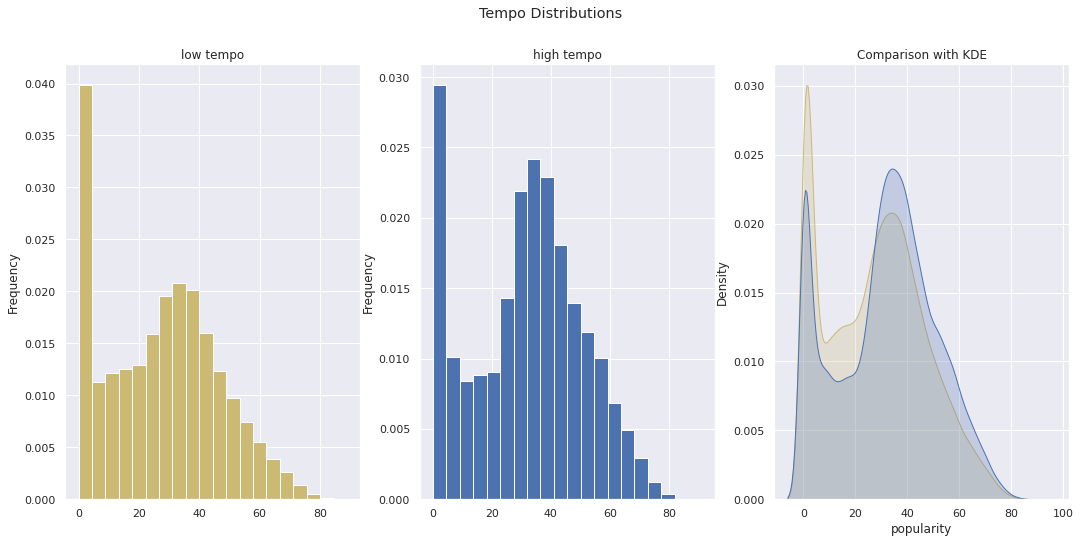

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
low_tempo.plot(kind="hist", ax=ax[0], bins=20, label="low_tempo", color="y", density=True)
ax[0].set_title("low tempo")


high_tempo.plot(kind="hist", ax=ax[1], bins=20, label="high_tempo", color="b", density=True)
ax[1].set_title("high tempo")


sns.kdeplot(low_tempo, shade=True, label="low energy level songs", ax=ax[2], color="y")
sns.kdeplot(high_tempo, shade=True, label="high energy level songs", ax=ax[2], color="b")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Tempo Distributions")
plt.show()


**Conclusion of Hypothesis Testing:**

In [ ]:
#T-test
stats.ttest_ind(high_tempo, low_tempo, equal_var=False)

Ttest_indResult(statistic=41.61982945923069, pvalue=0.0)

-Since the p value is less than 0.05 we have to reject Null Hypothesis.

-After the testing we can say that song with high level tempo are more popular than low level tempo songs. In addition, the test score is positive which indicates that the mean score for songs which have high level tempo is higher than low level ones.



### How danceability feature contribute to popularity of songs

In [ ]:
dance = df3["danceability"]
print("Mean of the danceability: ",dance.mean())


Mean of the danceability:  0.5291622352149806


In [ ]:
#Creating low and high danceability dataframes.
low_dance = df3[df3["danceability"] < dance.mean()	]["popularity"]
high_dance = df3[df3["danceability"] > dance.mean()	]["popularity"]

In [ ]:
print(f"mean popularity of songs which has low danceability level: {low_dance.mean():.2f}")
print(f"mean popularity of songs which has high danceability level: {high_dance.mean():.2f}")

mean popularity of songs which has low danceability level: 25.78
mean popularity of songs which has high danceability level: 33.20


**Hypothesis Test:** We want to test whether there is significant differences between popularity of low level danceability songs and high level danceability songs.<p>
**Null Hypothesis ( H0 ):** There is no differences between popularity of low level danceability and high level danceability songs.<p>
$ H_0: \mu_{d_h} = \mu_{d_l} $ <p>
**Alternative Hypothesis ( HA ):** The songs with high danceability level are more popular than songs with low danceability level.<p>
$ H_A: \mu_{d_h} > \mu_{d_l} $ <p>
**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too

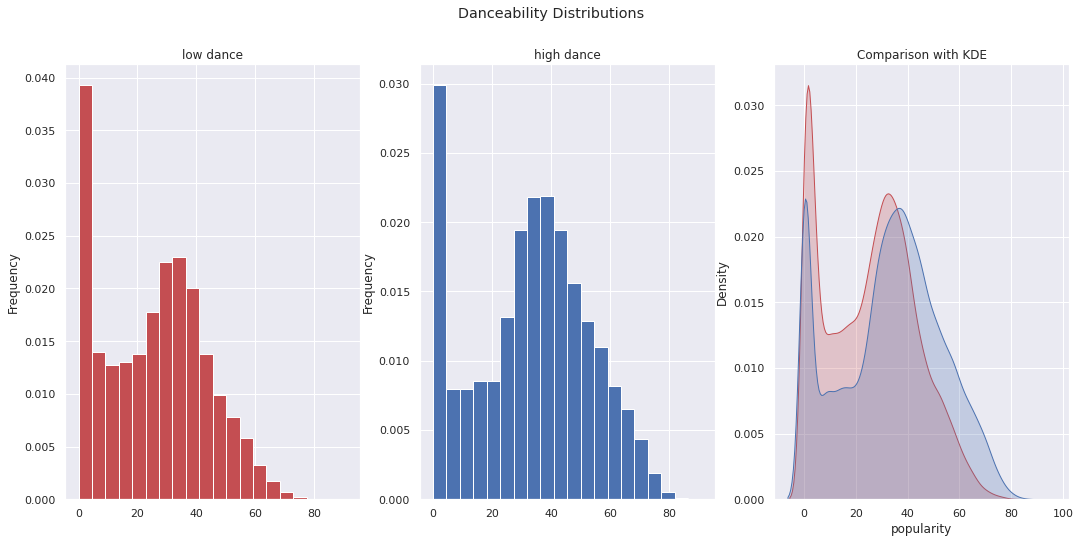

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
low_dance.plot(kind="hist", ax=ax[0], bins=20, label="low_dance", color="r", density=True)
ax[0].set_title("low dance")


high_dance.plot(kind="hist", ax=ax[1], bins=20, label="high_dance", color="b", density=True)
ax[1].set_title("high dance")


sns.kdeplot(low_dance, shade=True, label="low energy level songs", ax=ax[2], color="r")
sns.kdeplot(high_dance, shade=True, label="high energy level songs", ax=ax[2], color="b")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Danceability Distributions")
plt.show()

**Conclusion of Hypothesis Testing:**

In [ ]:
#T-test
stats.ttest_ind(high_dance, low_dance, equal_var=False)

Ttest_indResult(statistic=75.57585194115484, pvalue=0.0)

-Since the p value is less than 0.05 we have to reject Null Hypothesis.

-After the testing we can say that song with high level danceability are more popular than low level danceability songs. In addition, the test score is positive which indicates that the mean score for songs which have high level danceability is higher than low level ones.

## Statistical tests to check if significant differences exist between different eras

#### 90's Metal and 00's Metal songs tempo feature

In [ ]:
df_metal_90_plus = df_metal[df_metal["year"] >= 1990 ]
df_metal_90s = df_metal_90_plus[df_metal_90_plus["year"] <= 1999]
df_metal_90s.head()

,artists,name,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
release_date,,,,,,,,,,,,,,,,
1990-01-01,Forbidden,Infinite,1990,6,metal,0.001384,0.286667,346817.666667,0.994000,0.015697,0.165833,-4.660667,33.833333,0.268167,108.509500,0.091483
1991-08-12,Coroner,Semtex Revolution,1991,4,metal,0.000032,0.350750,320140.250000,0.822250,0.588500,0.311500,-11.242500,39.000000,0.068225,128.289250,0.415750
1992-06-30,Dream Theater,Pull Me Under,1992,38,metal,0.024056,0.465000,477574.236842,0.863105,0.084911,0.166808,-8.616395,53.868421,0.053953,112.194789,0.307408
1992-06-30,Dream Theater,Take the Time,1992,38,metal,0.023803,0.372500,481074.236842,0.839105,0.060031,0.125158,-8.995895,46.368421,0.078603,124.341789,0.351408
1992-06-30,Dream Theater,Learning to Live,1992,38,metal,0.024182,0.379000,575721.236842,0.801605,0.080861,0.157308,-9.388395,43.868421,0.056953,124.388289,0.450908


In [ ]:
df_metal_90s_tempo = df_metal_90s["tempo"]
print("Tempo mean of the metal songs in 1990s: ",df_metal_90s_tempo.mean())
df_metal_90s_tempo.head()

Tempo mean of the metal songs in 1990s:  122.91253531855955


release_date
1990-01-01    108.509500
1991-08-12    128.289250
1992-06-30    112.194789
1992-06-30    124.341789
1992-06-30    124.388289
Name: tempo, dtype: float64

In [ ]:
df_metal_00s = df_metal[df_metal["year"] >= 2000 ]
df_metal_00s.head()

,artists,name,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
release_date,,,,,,,,,,,,,,,,
2004-10-05,Dream Theater,"Hollow Years - Live at Budokan Hall, Tokyo, Ja...",2004,38,metal,0.024736,0.355000,509721.236842,0.687105,0.059486,0.166808,-7.493895,39.868421,0.048553,99.020289,0.210458
2005-06-06,Dream Theater,Panic Attack,2005,38,metal,0.023786,0.446000,477121.236842,0.872605,0.061156,0.148308,-6.842895,51.368421,0.093703,124.080289,0.231908
2008-01-01,Sabaton,Panzerkampf,2008,14,metal,0.004357,0.486286,274198.285714,0.885571,0.000144,0.288893,-4.634786,60.500000,0.050414,105.517857,0.468286
2008-01-01,Sabaton,Ghost Division,2008,14,metal,0.001631,0.411286,231924.785714,0.917571,0.000150,0.234893,-3.932786,62.000000,0.057014,144.567357,0.433786
2008-07-13,Nevermore,Dead Heart in a Dead World - live at the Zeche...,2008,38,metal,0.000182,0.262605,330166.473684,0.961526,0.066875,0.786474,-5.124079,9.578947,0.154600,111.474421,0.176929


In [ ]:
df_metal_00s_tempo = df_metal_00s["tempo"]
print("Tempo mean of the metal songs in 2000s: ",df_metal_00s_tempo.mean())
df_metal_00s_tempo.head()

Tempo mean of the metal songs in 2000s:  118.97237781954888


release_date
2004-10-05     99.020289
2005-06-06    124.080289
2008-01-01    105.517857
2008-01-01    144.567357
2008-07-13    111.474421
Name: tempo, dtype: float64

**Hypothesis Test:** We want to test whether there is significant differences between tempo feature of 90s metal and 00s metal songs.<p>
**Null Hypothesis ( H0 ):** There is no differences between tempo feature of 90s metal and 00s metal songs.<p>
$ H_0: \mu_{90_t} = \mu_{00_t} $ <p>
**Alternative Hypothesis ( HA ):** 90s metal songs have high level tempo feature than 00s.<p>
$ H_A: \mu_{90_t} > \mu_{00_t} $ <p>
**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too

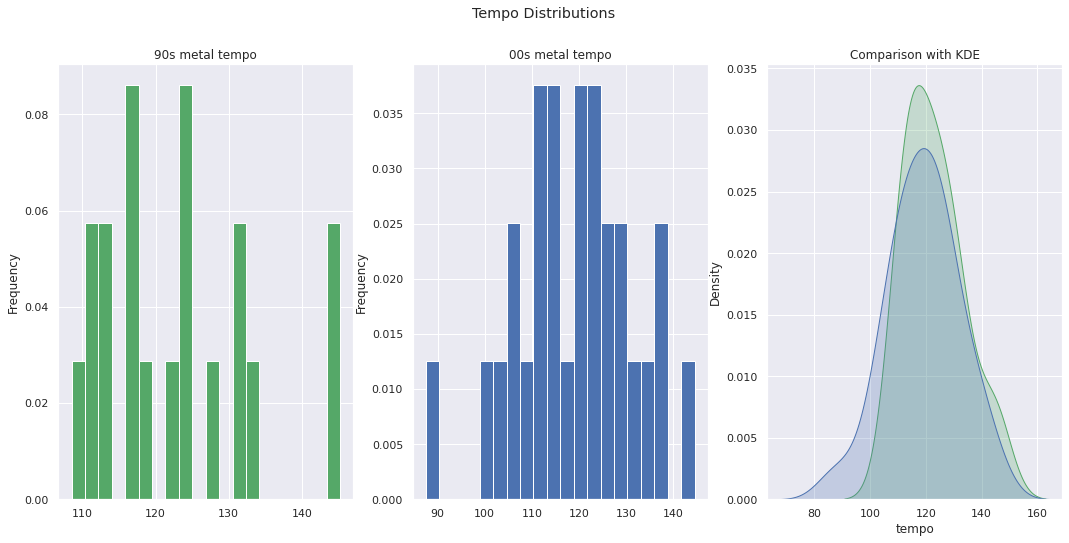

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
df_metal_90s_tempo.plot(kind="hist", ax=ax[0], bins=20, label="metal_90s_tempo", color="g", density=True)
ax[0].set_title("90s metal tempo")


df_metal_00s_tempo.plot(kind="hist", ax=ax[1], bins=20, label="metal_00s_tempo", color="b", density=True)
ax[1].set_title("00s metal tempo")


sns.kdeplot(df_metal_90s_tempo, shade=True, label="low energy level songs", ax=ax[2], color="g")
sns.kdeplot(df_metal_00s_tempo, shade=True, label="high energy level songs", ax=ax[2], color="b")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Tempo Distributions")
plt.show()

**Conclusion of Hypothesis Testing:**

In [ ]:
#T-test
stats.ttest_ind(df_metal_90s_tempo, df_metal_00s_tempo, equal_var=False)

Ttest_indResult(statistic=1.147286687093559, pvalue=0.2576105023819878)

-Since the p value is greater than 0.05, we fail to reject Null Hypothesis.

-We can say that there is no significant difference between tempo features of 90s and 00s metal songs.

### 2000's hip hop and 2010's hip hop songs danceability feature

In [ ]:
df_hiphop = droppedDf[droppedDf["genres"] == "hip hop"]
df_hiphop_00_plus = df_hiphop[df_hiphop["year"] >= 2000]
df_hiphop_00s = df_hiphop_00_plus[df_hiphop_00_plus["year"]<=2009]
df_hiphop_00s.head()

,artists,name,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
release_date,,,,,,,,,,,,,,,,
2002-01-01,Montell Jordan,Let's Ride,2002,10,hip hop,0.065649,0.800450,275725.300000,0.543800,0.082840,0.154635,-6.680000,38.550000,0.094000,122.082050,0.564000
2001-10-30,Jewel,Standing Still,2001,33,hip hop,0.429529,0.551833,251021.424242,0.507706,0.000513,0.173265,-8.743939,45.106061,0.034992,115.824879,0.355061
2003-06-03,Jewel,Intuition,2003,33,hip hop,0.355764,0.603333,230301.424242,0.566706,0.003655,0.165415,-7.590439,44.106061,0.047292,103.890379,0.593061
2001-01-01,Control,Cumbia Del Sol,2001,12,hip hop,0.210333,0.819417,198104.750000,0.784250,0.062990,0.162258,-7.430500,52.333333,0.043150,105.725750,0.839000
2005-01-01,Control,Cumbia Morena,2005,12,hip hop,0.208333,0.823417,198184.750000,0.753250,0.062935,0.218258,-6.408500,50.833333,0.041800,107.282250,0.931000


In [ ]:
df_hiphop_10_plus = df_hiphop[df_hiphop["year"]>= 2010]
df_hiphop_10s = df_hiphop_10_plus[df_hiphop_10_plus["year"] <=2019]
df_hiphop_10s.head()

,artists,name,year,count,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
release_date,,,,,,,,,,,,,,,,
2011-06-07,Tech N9ne,Am I A Psycho,2011,43,hip hop,0.061192,0.712767,254052.418605,0.782581,5.202326e-07,0.535567,-4.099209,57.406977,0.25942,111.473791,0.5375
2011-06-07,Tech N9ne,Worldwide Choppers,2011,43,hip hop,0.057217,0.734267,295112.418605,0.821081,5.202326e-07,0.353567,-4.620709,56.406977,0.17242,135.254791,0.4480
2015-05-04,Tech N9ne,Hood Go Crazy,2015,43,hip hop,0.059362,0.817267,244418.918605,0.716581,5.202326e-07,0.219067,-5.709709,58.906977,0.25142,118.240291,0.5130
2013-07-30,Tech N9ne,Fragile,2013,43,hip hop,0.105492,0.718767,250085.418605,0.628581,5.202326e-07,0.228067,-6.226709,56.406977,0.18092,167.691791,0.6035
2016-12-09,Tech N9ne,Erbody But Me,2016,43,hip hop,0.069492,0.772767,230425.418605,0.747081,5.202326e-07,0.211517,-4.759709,58.406977,0.24842,163.300791,0.6850


In [ ]:
df_hiphop_00s_dance = df_hiphop_00s["danceability"]
print("Danceability mean of 2000s hiphop: ",df_hiphop_00s_dance.mean())

Danceability mean of 2000s hiphop:  0.6891847953696987


In [ ]:
df_hiphop_10s_dance = df_hiphop_10s["danceability"]
print("Danceability mean of 2010s hiphop: ",df_hiphop_10s_dance.mean())

Danceability mean of 2010s hiphop:  0.663887057554611


**Hypothesis Test:** We want to test whether there is significant differences between danceability feature of 2000s hiphop and 2010s hiphop songs.<p>
**Null Hypothesis ( H0 ):** There is no differences between danceability feature of 2000s hiphop and 2010s hiphop songs.<p>
$ H_0: \mu_{00_d} = \mu_{10_d} $ <p>
**Alternative Hypothesis ( HA ):** 2000s hiphop songs's danceability level is higher than 2010's.<p>
$ H_A: \mu_{00_d} > \mu_{10_d} $ <p>
**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too

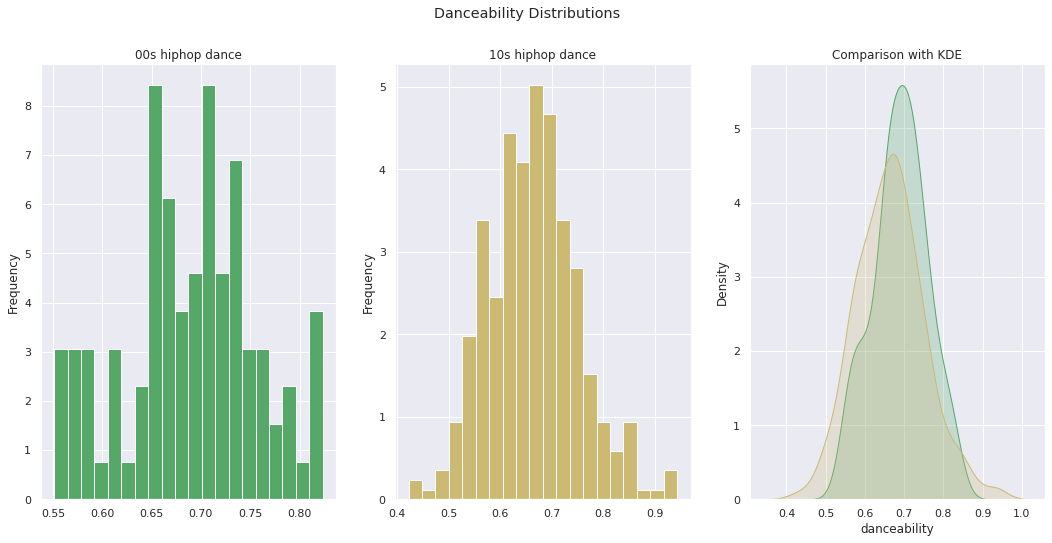

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
df_hiphop_00s_dance.plot(kind="hist", ax=ax[0], bins=20, label="metal_90s_tempo", color="g", density=True)
ax[0].set_title("00s hiphop dance")


df_hiphop_10s_dance.plot(kind="hist", ax=ax[1], bins=20, label="metal_00s_tempo", color="y", density=True)
ax[1].set_title("10s hiphop dance")


sns.kdeplot(df_hiphop_00s_dance, shade=True, label="low energy level songs", ax=ax[2], color="g")
sns.kdeplot(df_hiphop_10s_dance, shade=True, label="high energy level songs", ax=ax[2], color="y")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Danceability Distributions")
plt.show()

**Conclusion of Hypothesis Testing:**

In [ ]:
#T-test
stats.ttest_ind(df_hiphop_00s_dance, df_hiphop_10s_dance, equal_var=False)

Ttest_indResult(statistic=2.988713934813288, pvalue=0.0031646556315561)

-Since the p value is less than 0.05 we have to reject Null Hypothesis.

-After the testing we can say that 2000s hiphop songs have higher danceability level than 2010s hiphop songs. In addition, the test score is positive which indicates that the mean score of 2000s danceability is higher than 2010s danceability.


### 80's blues and 90's blues songs acousticness feature

In [ ]:
df_blues_80_plus = df_blues[df_blues["year"] >= 1980]
df_blues_80s = df_blues_80_plus[df_blues_80_plus["year"] <= 1989]
df_blues_80s_acousticness = df_blues_80s["acousticness"]
print("Acousticness mean of 80s blues: ",df_blues_80s_acousticness.mean())
df_blues_80s_acousticness

Acousticness mean of 80s blues:  0.3767616823840082


release_date
1980-01-01    0.260502
1980-01-01    0.394200
1980-01-01    0.416627
1980-01-01    0.401127
1980-01-01    0.458627
                ...   
1989-11-07    0.732414
1989-11-07    0.349964
1989-11-07    0.609914
1989-11-07    0.725914
1989-11-07    0.811914
Name: acousticness, Length: 77, dtype: float64

In [ ]:
df_blues_90_plus = df_blues[df_blues["year"] >= 1990]
df_blues_90s = df_blues_90_plus[df_blues_90_plus["year"] <= 1999]
df_blues_90s_acousticness = df_blues_90s["acousticness"]
print("Acousticness mean of 90s blues: ",df_blues_90s_acousticness.mean())
df_blues_90s_acousticness

Acousticness mean of 90s blues:  0.3746842548683559


release_date
1990-01-01    0.602000
1990-01-01    0.326477
1990-01-01    0.553477
1990-06-07    0.208650
1990-07-26    0.352579
                ...   
1998-01-01    0.125000
1999-01-01    0.293007
1999-01-01    0.483021
1999-01-01    0.315021
1999-10-08    0.607812
Name: acousticness, Length: 62, dtype: float64

**Hypothesis Test:** We want to test whether there is significant differences between acousticness feature of 80s blues and 90s blues songs.<p>
**Null Hypothesis ( H0 ):** There is no differences between acousticness feature of 80s blues and 90s blues songs.<p>
$ H_0: \mu_{80_a} = \mu_{90_a} $ <p>
**Alternative Hypothesis ( HA ):** 80s blues songs's acousticness level is higher than 90's.<p>
$ H_A: \mu_{80_a} > \mu_{90_a} $ <p>
**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too

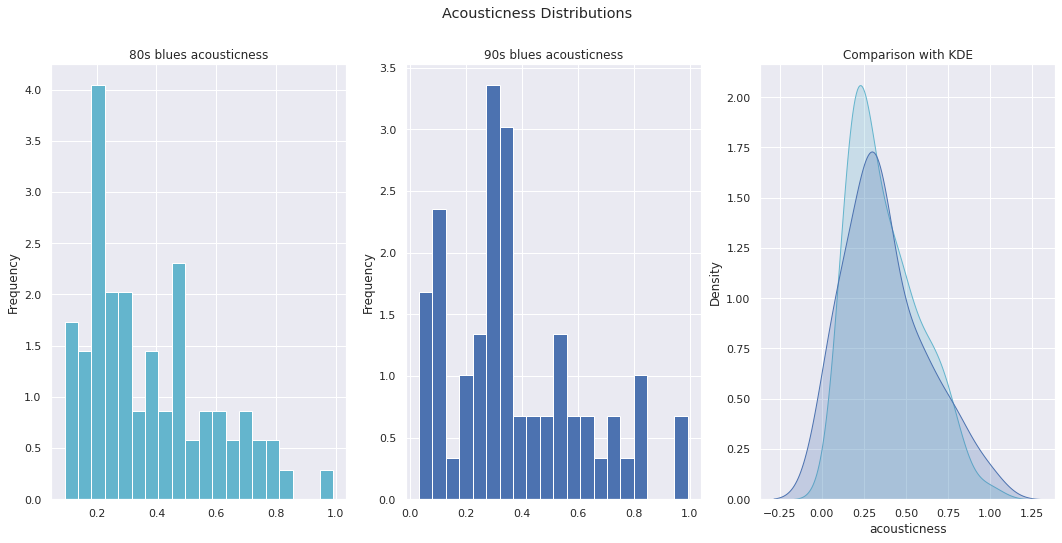

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
df_blues_80s_acousticness.plot(kind="hist", ax=ax[0], bins=20, label="metal_90s_tempo", color="c", density=True)
ax[0].set_title("80s blues acousticness")


df_blues_90s_acousticness.plot(kind="hist", ax=ax[1], bins=20, label="df_blues_90s_acousticness", color="b", density=True)
ax[1].set_title("90s blues acousticness")


sns.kdeplot(df_blues_80s_acousticness, shade=True, label="low energy level songs", ax=ax[2], color="c")
sns.kdeplot(df_blues_90s_acousticness, shade=True, label="high energy level songs", ax=ax[2], color="b")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Acousticness Distributions")
plt.show()

**Conclusion of Hypothesis Testing:**

In [ ]:
#T-test
stats.ttest_ind(df_blues_80s_acousticness, df_blues_90s_acousticness, equal_var=False)


Ttest_indResult(statistic=0.05353525625361631, pvalue=0.9573940821547711)

-Since the p value is greater than 0.05, we fail to reject Null Hypothesis.

-We can say that there is no significant difference between acousticness features of 80s and 90s blues songs.

# Song Popularity Prediction

###  Categorization

In [ ]:
#loudness  categorization
#popularity categorization
def catPopularity(df):
    if df > 75:
        return 'Very Popular'
    elif df > 50 and df < 76:
        return 'Popular'
    elif df > 25 and df < 51:
        return 'Medium'
    else:
        return 'Not popular'
df3['isPopular'] = df3['popularity'].apply(catPopularity)


def catLoudness(loudness):
  if loudness < 0.25:
    return "low loudness"
  elif loudness < 0.50:
    return "medium loudness"
  elif loudness < 0.75:
    return " c"
  elif loudness < 1:
    return "very high loudness"


df3["isLoud"] = df3["loudness"].apply(catLoudness)
 
df5 = df3.drop(['artists','name','release_date','year','genres'],axis=1)
df6 = df3.drop(['release_date','duration_ms','year'],axis=1) 

###  Top Hot Encoding To Categorical Variables


In [ ]:
isEnergic= pd.get_dummies(df5['energy_level'], drop_first=True)
isLoud= pd.get_dummies(df5['isLoud'], drop_first=True)
isPopular= pd.get_dummies(df5['isPopular'], drop_first=True)
df5 = pd.concat([df5, isPopular, isEnergic, isLoud], axis = 1)
df5 = df5.drop(['isPopular','energy_level','isLoud'],axis=1)

###  Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler
featuress = df5.loc[:,df5.columns!='popularity']
target = df5.loc[:,df5.columns=='popularity']
scaler = StandardScaler()
featuress = scaler.fit_transform(featuress)
target = scaler.fit_transform(target)

###  Splitting Data as Train Test and Validation

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(featuress,target,test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=0, test_size=0.50)

### Linear Regression

####  Implementing Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressorLine=LinearRegression()
regressorLine.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####  Prediction

In [ ]:
predictionLine = regressorLine.predict(x_test)

####  Using evaluation metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("Training Score of Linear Regression is: {}\n".format(regressorLine.score(x_train, y_train)))
print("R2 Score of Linear Regression is: {}\n".format(r2_score(y_test, predictionLine)))
print("Mean Squared Error of Linear Regression is: {}\n".format(mean_squared_error(y_test, predictionLine)))
print("Mean Absolute Error of Linear Regression is: {}\n".format(mean_absolute_error(y_test, predictionLine)))

Training Score of Linear Regression is: 0.8665625922583429

R2 Score of Linear Regression is: 0.8663599145253135

Mean Squared Error of Linear Regression is: 0.13389267540056637

Mean Absolute Error of Linear Regression is: 0.3091299333718165



#### Visulization of Linear Regression

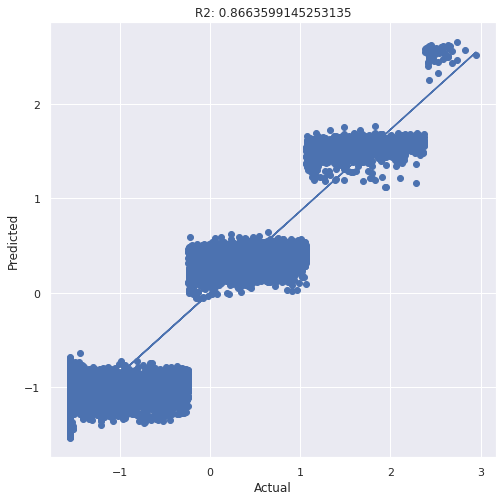

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y_test, predictionLine)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
y_test, y_predicted = y_test.reshape(-1,1), predictionLine.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, predictionLine).predict(y_test))
ax.set_title('R2: ' + str(r2_score(y_test, y_predicted)))
plt.show()

###  KNN

#### Implementing KNN Regression

In [ ]:
from sklearn import neighbors
from math import sqrt
K = 3
knnModel = neighbors.KNeighborsRegressor(n_neighbors = K)
knnModel.fit(x_train, y_train)  


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

#### Prediction

In [ ]:
prediccttion=knnModel.predict(x_test) 

####  Using evaluation metrics

In [ ]:
print("Mean Squared Error of KNN Regression is: {}\n".format(mean_squared_error(y_test, prediccttion)))
print("Mean Absolute Error of KNN Regressor is: {}\n".format(mean_absolute_error(y_test, prediccttion)))
print("R2 Score of KNN Regressor is: {}\n".format(r2_score(y_test, prediccttion)))


Mean Squared Error of KNN Regression is: 0.1073937258534503

Mean Absolute Error of KNN Regressor is: 0.24842730444884056

R2 Score of KNN Regressor is: 0.8928088735282719



###  Decision Tree Regression

#### Implementing Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decisionRegressor= DecisionTreeRegressor(random_state=0)
decisionRegressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

#### Prediction

In [ ]:
decisionPredictor= decisionRegressor.predict(x_test)

####  Using evaluation metrics

In [ ]:
print("Training Score of Decision Tree Regressor is: {}\n".format(decisionRegressor.score(x_train, y_train)))
print("R2 Score of Decision Tree Regressor is: {}\n".format(r2_score(y_test, decisionPredictor)))
print("Mean Squared Error of Decision Tree Regressor is: {}\n".format(mean_squared_error(y_test, decisionPredictor)))
print("Mean Absolute Error of Decision Tree Regressor is: {}\n".format(mean_absolute_error(y_test, decisionPredictor)))

Training Score of Decision Tree Regressor is: 0.9993599468624859

R2 Score of Decision Tree Regressor is: 0.8585955914809411

Mean Squared Error of Decision Tree Regressor is: 0.14167167360602775

Mean Absolute Error of Decision Tree Regressor is: 0.26895031712526535



#### Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(featuress, target)
    training_error.append(mean_squared_error(target, model_1.predict(featuress)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(x_train, y_train)
    testing_error.append(mean_squared_error(y_test, model_2.predict(x_test)))



#### Visulization of Error related to Max Depth of Tree

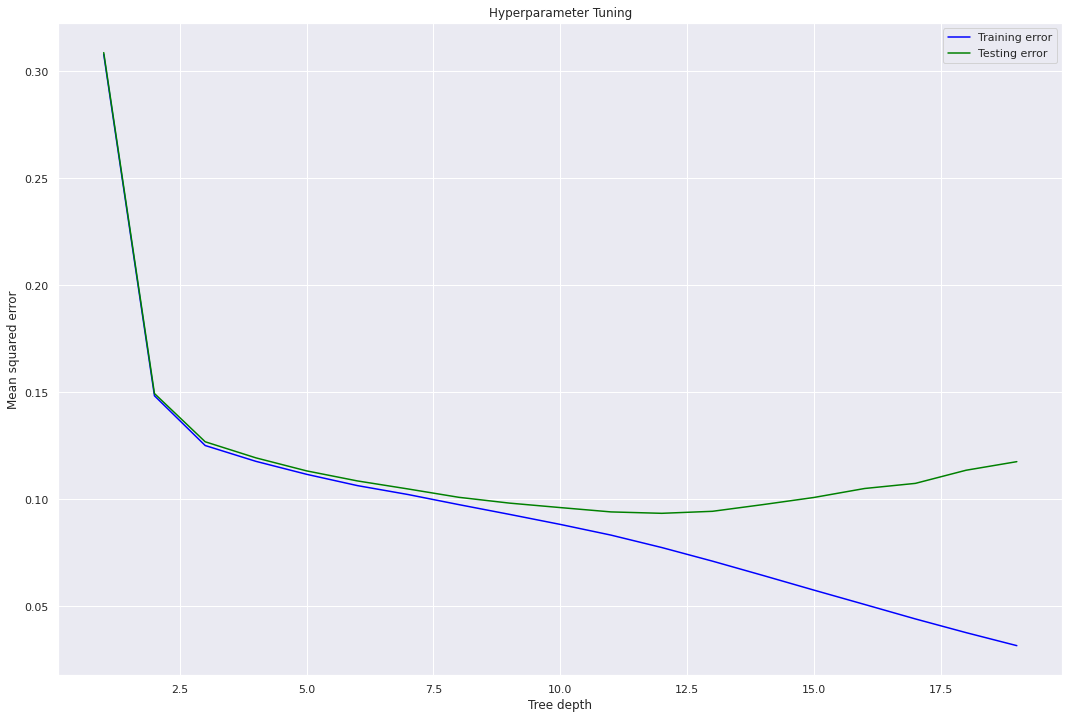

In [ ]:
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning')
plt.legend()

### Conclusion of Prediction Algorithms

- The best algorithm with evaluating the metrics is KNN. Because its mean squared error is lowest than other algorithms'.

# Simple Recommendation System

In [ ]:
from sklearn import preprocessing
from scipy.spatial import distance
X = df6.select_dtypes(np.number) # getting numeric values of dataframe
distance_columns = list(X.columns)
df6[distance_columns]  = preprocessing.normalize(df6[distance_columns])
df7 = df6
df6.drop_duplicates(subset="name", keep="first", inplace=True)

### Song Recommendation With KNN

In [ ]:
from sklearn import preprocessing
from scipy.spatial import distance
X = df6.select_dtypes(np.number) # getting numeric values of dataframe
distance_columns = list(X.columns)
df6[distance_columns]  = preprocessing.normalize(df6[distance_columns])
df7 = df6

def recommendSong(songName,data,k):
    song_data = data[data["name"]==songName]
    song_data = song_data.select_dtypes(np.number)
    distances = []
    d = np.array(song_data)
    data = data.select_dtypes(np.number)
    data = np.array(data)
    for instance in data:
      dist = distance.euclidean(d,instance)
      distances.append(dist)
    df7["distance"]=distances
    df7.sort_values(by="distance",ascending=True, inplace=True)
 
    recommended_songs = df7[1:k+1]
    print("Recommended Songs: \n")
    for i in range(k):
        print(recommended_songs.iloc[i]["name"])

### Getting Input From User



In [ ]:
c = str(input("What is the favourite song: ")) 

What is the favourite song: Standing Still


###Recommend Song

In [ ]:
recommendSong(c,df6,3) #recommend 3 songs 


Recommended Songs: 

Softest Place On Earth
400 Degreez
El pequeño tamborilero
